#Importing libraries and data

In [ ]:
!!pip install osmnx
!! pip install geopandas

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ast import literal_eval
import osmnx as ox
from shapely.geometry import Polygon
import seaborn as sns

In [ ]:
!python -m pip uninstall matplotlib
!!pip install matplotlib==3.1.3

In [39]:
# reading road construction polygons
road_construction = pd.read_csv('hungary_road_construction.csv',sep=";",index_col=None,header=None)
road_construction.columns = ["name","year","month","day","points"]
road_construction.head()

,name,year,month,day,points
0,Polgári Tisza-hid,2002,10.0,1.0,"[[21.0552074392,47.8535623743],[21.0510017355,..."
1,Szekszard Szent Laszlo-hid,2003,7.0,4.0,"[[18.8875748594,46.3498790197],[18.887274452,4..."
2,Dunaujvaros Pentele-hid,2007,7.0,23.0,"[[18.9884702044,46.8892504416],[18.9010945635,..."
3,M3 Fuzesabony-Polgar,2002,NaN,NaN,"[[20.4282135249,47.7251911319],[20.4055542231,..."
4,M3 Polgar-Gorbehaza,2004,9.0,NaN,"[[21.2596564086,47.7818136227],[21.1813788207,..."


#Exploration

Text(0.5, 1.0, 'Hungary road construction per year')

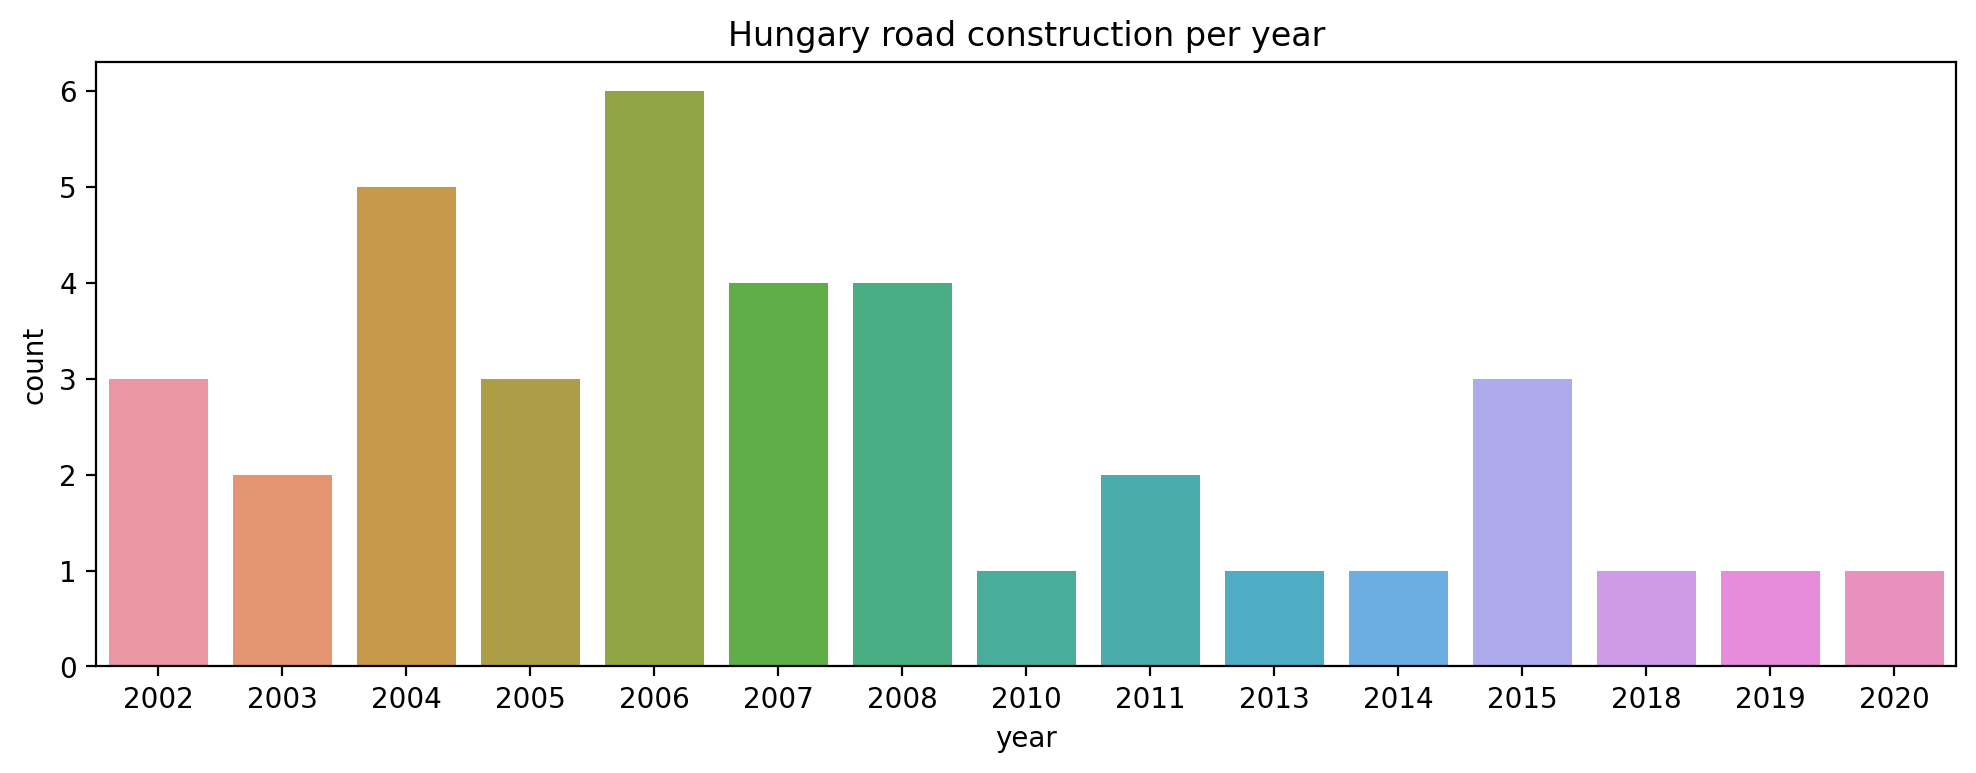

In [15]:
fig, ax=plt.subplots(nrows=1 ,ncols=1 , figsize=(12 , 4) , dpi=200)
sns.countplot(data=road_construction, x='year', ax=ax)
ax.set_title('Hungary road construction per year')

1. we don't need the columns month and day so I will remove them!
2. We do not constructions which are greater than 2012

In [40]:
road_construction.drop(columns=['month' , 'day'] , inplace=True)
road_construction.year.map(int)
road_construction=road_construction[road_construction.year<=2012]
road_construction.reset_index(drop=True)
road_construction.head()

,name,year,points
0,Polgári Tisza-hid,2002,"[[21.0552074392,47.8535623743],[21.0510017355,..."
1,Szekszard Szent Laszlo-hid,2003,"[[18.8875748594,46.3498790197],[18.887274452,4..."
2,Dunaujvaros Pentele-hid,2007,"[[18.9884702044,46.8892504416],[18.9010945635,..."
3,M3 Fuzesabony-Polgar,2002,"[[20.4282135249,47.7251911319],[20.4055542231,..."
4,M3 Polgar-Gorbehaza,2004,"[[21.2596564086,47.7818136227],[21.1813788207,..."


Further exploration

Text(0.5, 1.0, 'Hungary road construction per year (2002-2012)')

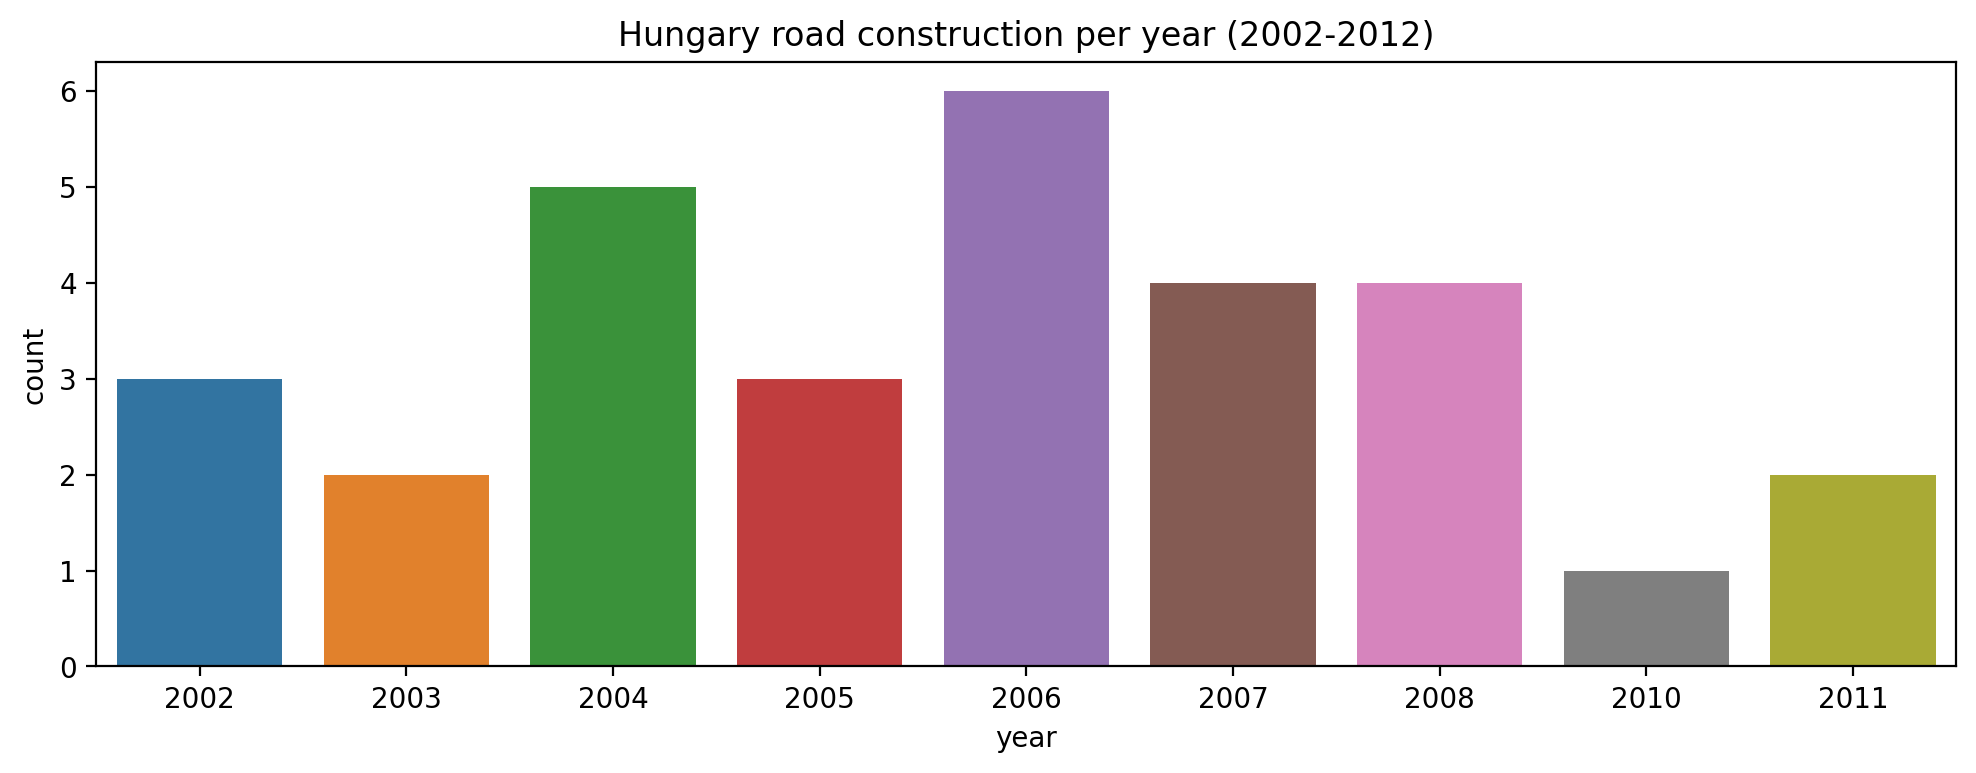

In [41]:
fig, ax=plt.subplots(nrows=1 ,ncols=1 , figsize=(12 , 4) , dpi=200)
sns.countplot(data=road_construction, x='year', ax=ax)
ax.set_title('Hungary road construction per year (2002-2012)')

Pie chart may be usable!

In [63]:
df = road_construction.year.value_counts().rename_axis('year').to_frame('counts').reset_index()
df.sort_values(by=['year'] , inplace=True)

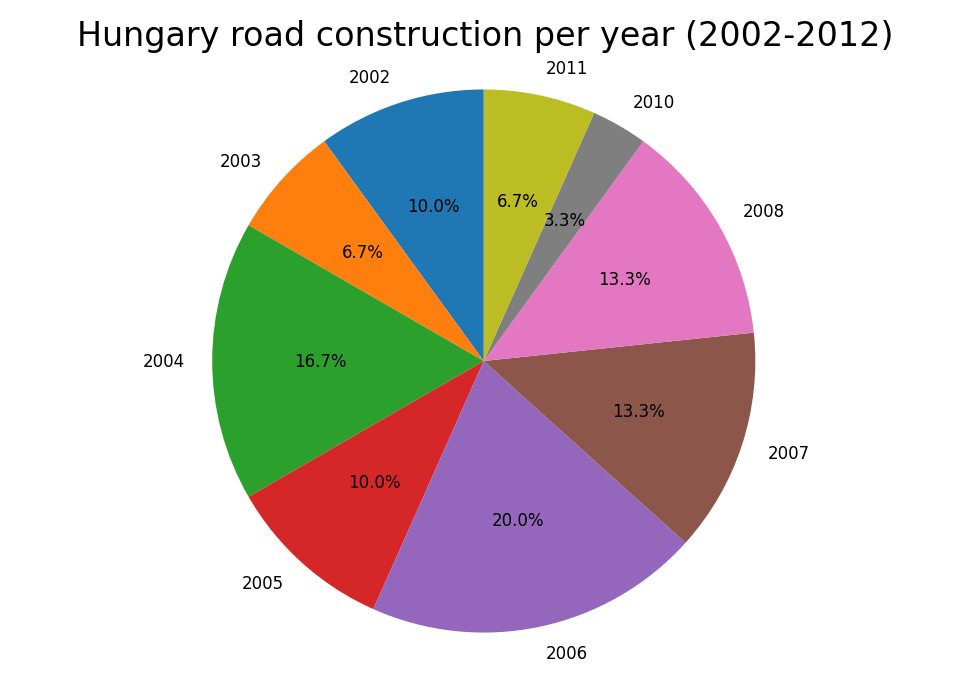

In [78]:
fig, ax = plt.subplots(nrows =1 , ncols=1 , dpi=200)
ax.pie(df.counts, labels=df.year, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Hungary road construction per year (2002-2012)', fontsize=12)
plt.show()

Number of total constructions :

In [42]:
road_construction.year.count()

30

it is not that much to remove by hand. So I wouldn't automize this one.!